# 习题6

6.1 某公司有5个项目被列入投资计划，各项目的投资额和期望的投资收益如表6.6 所示．

                    表6.6 不同项目的投资额和期望收益

| 项目| 投资额/百万元 | 投资收益/百万元 |
| ------ | --- | --- |
| 1      | 210             | 150               |
| 2      | 300             | 210               |
| 3      | 100             | 60                |
| 4      | 130             | 80                |
| 5      | 260             | 180               |


该公司只有600百万元资金可用于投资，由于技术上的原因投资受到以下约束：

(1)在项目1,2和3中有且仅有一项被选中．

(2)项目3和项目4只能选中一项．

(3)项目5被选中的前提是项目1必须被选中

如何在上述条件下选择一个最好的投资方案，使投资收益最大？

解：决策变量为：
$$
x_i=\begin{cases}
1,投资i项目\\
0,不投资i项目
\end{cases}
\qquad i=1,2,3,4,5
$$

In [2]:
import cvxpy as cp
import numpy as np
M=1000000
c=np.array([150,210,60,80,180])
beq=np.array([210,300,100,130,260])
x=cp.Variable(5,integer=True)
obj=cp.Maximize(cp.sum(cp.multiply(c,x)))
con=[x[0]+x[1]+x[2]==1,x[2]+x[3]==1,x[4]<=M*x[0],
     cp.sum(cp.multiply(beq,x))<=600,x<=1,x>=0]#6个约束
prob=cp.Problem(obj,con)
prob.solve()
print("需要投资的项目是:",[i for i in x.value])
print("该组合下最大投资为:",prob.value)



需要投资的项目是: [1.0, 0.0, 0.0, 1.0, 1.0]
该组合下最大投资为: 410.0


6.2 一架货机，有效载重为24吨可运输物品的重量及运费收入如表6.7所示，其中各物品只有一件可供选择，问如何选运物品使得运费总收入最多？

                       表6.7 运输品的重量及运费
|物品|1|2|3|4|5|6|
|---|---|---|---|---|---|---|
|重量／吨|8|13|6|9|5|7|
|收入／万元|3|5|2|4|2|3|

In [3]:
import cvxpy as cp
import numpy as np
c=np.array([3,5,2,4,2,3])
A=np.array([8,13,6,9,5,7]);b=24
x=cp.Variable(6,integer=True)
obj=cp.Maximize(cp.sum(cp.multiply(c,x)))
con=[cp.sum(cp.multiply(A,x))<=24,x<=1,x>=0]
prob=cp.Problem(obj,con)
prob.solve()
print("可行解为：",x.value)
print('最大值为：',prob.value)


可行解为： [1. 0. 0. 1. 0. 1.]
最大值为： 10.0


6.3 有4名同学到一家公司参加三个阶段的面试：公司要求每名同学都必须首先找公司秘书初试然后到部门主管处复试，最后到经理处参加面试，并且不允许插队（即在任何一个阶段4名同学的顺序是一样的）． 由千4名同学的专业背景不同，所以每人在三个阶段的面试时间也不同，如表6.8所示．这4名同学约定他们全部面试完以后一起离开公司． 假定现在时间是早晨8:00，请问他们最早何时能离开公司？

                            表6.8 面试时间要求
| |秘书初试|主管复试|经理面试|
|---|---|---|---|
|同学甲|14|16|21|
|同学乙|19|17|10|
|同学丙|10|15|12|
|同学丁|9|12|13|             

解：
1.假设公司的秘书，主管，经理均只有一人，需要排队轮流面试，需要确定的是进行秘书的面试的顺序（因为不允许插队，所以当第一轮面试顺序确定之后也就决定了最后的时间）

2.记8：00为初始0时刻（单位：分钟）

3.设决策变量为$x_{ij}$，代表第$i$个同学接受第$j$个考官面试的开始时间，$t_{ij}$代表着这次面试所需的时间

4.约束条件为：

每个同学的面试顺序：$x_{ik}+t_{ik}<x_{i+1,k}$

同学之间的先后顺序（如甲在秘书面试时，其余三人都不在）:记$y_{jk}$表示第k名同学排在第i名同学的前面。$y_{ik}=1或0$

$x_{ij}+t_{ij}-x_{kj}\leq time y_{ik}\qquad i,k=1,2,3,4\quad i<k\quad j=1,2,3$

$x_{kj}+t_{kj}-x_{ij}\leq time(1-y_{ik})\qquad i,k=1,2,3,4\quad i<k\quad j=1,2,3$

建立模型（混合整数规划）：
$$
min\quad max \{t_{i3}+x_{i3}\} \\
\begin{cases}
x_{ij}+t_{ij}-x_{kj}\leq max \{t_{i3}+x_{i3}\}y_{ik}\\
x_{kj}+t_{kj}-x_{ij}\leq max \{t_{i3}+x_{i3}\}(1-y_{ik})\\
x_{ij}+t_{ij}<x_{i,j+1}
\end{cases}
$$


In [23]:
import numpy as np
from scipy.optimize import linprog

# 初始化问题参数
persons = range(4)
stages = range(3)
times = [
    [13.0, 15.0, 20.0],    # 甲
    [10.0, 20.0, 18.0],    # 乙
    [20.0, 16.0, 10.0],    # 丙
    [8.0, 10.0, 15.0],     # 丁
]

# 定义目标函数系数和约束条件矩阵
c = np.ones((len(persons),))
A_eq = np.empty((0, 12))
b_eq = np.empty((0,))
A_ub = np.empty((0, 12))
b_ub = np.empty((0,))

for p in persons:
    for s in stages:
        if p == 0 and s == 0:
            A_eq = np.concatenate((A_eq, np.array([[1] + [0]*11])))
            b_eq = np.concatenate((b_eq, np.array([times[p][s]])))
            A_ub = np.concatenate((A_ub, np.array([[1] + [0]*11])))
            b_ub = np.concatenate((b_ub, np.array([times[p][s]])))
        else:
            # 调度时间约束
            row = [0]*(3*p+s-1)
            for j in range(3):
                if j >= s:
                    row.append(0)
                else:
                    row.append(-1)
            if s < 2:
                row += [1, 0, 0]
            else:
                row += [-1, 1, 0]
            row += [0]*(8-3*p-s)
            A_eq = np.concatenate((A_eq, np.array([row])))
            b_eq = np.concatenate((b_eq, np.array([times[p][s] - times[p][s-1]])))

            # 面试时长不超过规定时长的约束
            row = [0]*(3*p+s)
            row.append(-1)
            row += [0]*(8-3*p-s)
            A_ub = np.concatenate((A_ub, np.array([row])))
            b_ub = np.concatenate((b_ub, np.array([0])))
            for i in persons[:p]:
                row = [0]*(3*i+s)
                row.append(-1)
                row += [0]*(3*(p-i-1))
                row += [0, 0, -1]
                row += [0]*(5-3*(p-i)-s)
                A_ub = np.concatenate((A_ub, np.array([row])))
                b_ub = np.concatenate((b_ub, np.array([0])))

            # 最晚结束时间的约束
            row = [0]*(3*p+s)
            row += [1, 0, 0]
            row += [0]*(5-s)
            A_ub = np.concatenate((A_ub, np.array([row])))
            b_ub = np.concatenate((b_ub, np.array([480 + times[p][s-1]])))
        for j in range(s):
            row = [0]*(3*p+j)
            row += [-1, 0, 0]
            row += [0]*(2-j)
            row += [1]
            row += [0]*(5-s)
            A_ub = np.concatenate((A_ub, np.array([row])))
            b_ub = np.concatenate((b_ub, np.array([0])))

# 求解模型
res = linprog(c=c, A_eq=A_eq, b_eq=b_eq, A_ub=A_ub, b_ub=b_ub, method='simplex')

# 输出结果
t = res.x[0]
times = res.x[1:].reshape((len(persons), len(stages)))

print(f'Minimum total time: {round(res.fun / 60, 2)} hours')
for p in persons:
    for s in stages:
        print(f'{chr(65+p)} 在第{s+1}轮面试结束的时间为: {int(times[p][s]/60)}:{int(times[p][s]%60):02}')
earliest_time = round(t/60)
print(f'Earliest leaving time: {earliest_time // 60}:{earliest_time % 60:02}')


ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 12 and the array at index 1 has size 13

6.4 某工厂向用户提供发动机，按合同规定，其交货数量和日期是：第一季度末交40台，第二季度末交60台，第三季度末交80台． 工厂的最大生产能力为每季1 00台，每季的生产费用是$f(x)=50000x+200x^2$（元），此处x为该季生产发动机的台数． 若工厂生产的多，多余的发动机可移到下季向用户交货，这样，工厂就需支付存储费，每台发动机每季的存储费为4000元。问该厂每季应生产多少台发动机，才能既满足交货合同，又使工厂所花费的费用最少（假定第一季度开始时发动机无存货）．

建立模型如下：

$$
min\quad z=50000(x_1+x_2+x_3)+200(x_1^2+x_2^2+x_3^2)+4000(x_1-40)+4000(x_1+x_2-100)\\
\begin{cases}
0\leq x_1\leq100\\
0\leq x_2\leq100\\
0\leq x_3\leq100\\
-x_1\leq-40\\
-x_1-x_2\leq-100\\
-x_1-x_2-x_3\leq-180
\end{cases}
$$

In [2]:
import numpy as np
from scipy.optimize import minimize
c1=np.array([200,200,200])
c2=np.array([58000,54000,50000])
A=np.array([[-1,0,0],
            [-1,-1,0],
            [-1,-1,-1]])
b=np.array([-40,-100,-180])
obj=lambda x:np.dot(c1,x**2)+np.dot(c2,x)-560000
cons={'type':'ineq','fun':lambda x:b-A@x}
bd=[(0,100) for i in range(A.shape[1])]
res=minimize(obj,np.ones(3)*40,constraints=cons,bounds=bd)
print(res)

     fun: 6880000.0
     jac: array([74000., 70000., 66000.])
 message: 'Positive directional derivative for linesearch'
    nfev: 4
     nit: 5
    njev: 1
  status: 8
 success: False
       x: array([40., 40., 40.])


6.5 已知矩阵 
$A=\begin{bmatrix}
   1 & 4 & 5\\
   4 & 2 & 6\\
   5 & 6 & 3
   \end{bmatrix},$
$x=\begin{bmatrix}
   x_1\\
   x_2\\
   x_3
   \end{bmatrix},$
求二次型$f(x_1,x_2,x_3)=x^TAx$在单位球面$x^2_1+x^2_2+x^2_3=1$上的最小值.

In [5]:
import numpy as np
from scipy.optimize import minimize

def eq_constraint(x):
    return x[0]**2 + x[1]**2 + x[2]**2 - 1

def obj_fn(x, A):
    return x.dot(A).dot(x)

x0 = np.array([0, 1, 0])

bounds = [(None, None) for i in range(3)]

constraints = [{'type': 'eq', 'fun': eq_constraint}]
bounds_dict = {'x{}'.format(i+1): bounds[i] for i in range(3)}

var_names = ['x1', 'x2', 'x3']

result = minimize(obj_fn, x0, args=(A,), method='SLSQP', 
                  constraints=constraints, bounds=bounds)

print('Optimal value: {}'.format(result.fun))
print('Optimal solution: {}'.format(result.x))


Optimal value: -2.0000000012799153
Optimal solution: [0.57735036 0.57735017 0.57735028]


6.6 某银行营业部设立3个服务窗口，分别为个人业务、公司业务和特殊业务（如外汇和理财等）． 现有3名服务人员，每人处理不同业务的效率（每天服务的最大顾客数）见表6.9，以及每人处理不同业务的质量（如顾客满意度）见表6.10.如何为服务人员安排相应的工作（服务窗口） 才能使服务效率和服务质量都高．

                      表6.9 最大顾客数
||个人业务|公司业务|特殊业务|
|---|---|---|---|
|员工一|20|12|10|
|员工二|12|15|9|
|员工三|6|5|10|

                      表6.10 顾客满意度
 ||个人业务|公司业务|特殊业务|
|---|---|---|---|
|员工一|6|8|10|
|员工二|6|5|9|
|员工三|9|10|8|                     

解：决策变量$x_{ij}$表示指派第i名员工去第j项业务，需要使$\sum_{i=1}^na_{ij}x_{ij}+\sum_{i=1}^nb_{ij}x_{ij}$最大

In [8]:
import cvxpy as cp
import numpy as np
#c=a+b\
c=np.array([[26,20,20],
            [18,20,18],
            [15,15,18]])
x = cp.Variable((3,3),integer=True)
obj = cp.Minimize(-cp.sum(cp.multiply(c,x)))
con = [0<=x,x<=1,cp.sum(x,axis=0,keepdims=True)==1,cp.sum(x,axis=1,keepdims=True)==1]
prob = cp.Problem(obj,con)
prob.solve(solver='GLPK_MI')
print("最优值为：",-prob.value)
print("最优解为：\n",x.value)

最优值为： 64.0
最优解为：
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


所以，派员工一去个人业务，员工二去公司业务，员工三去特殊业务

# 习题7

7.1 交通管理部门为了掌握一座桥梁的通行情况，在桥梁的 一端每间隔一段不等的时间连续记录lmin内通过桥梁的车辆数，连续观测一天24h的通过车辆数据如表7.7所示．试建模分析估计这一天中总共有多少车辆通过这座桥梁．

          表7.7 24h通过桥梁的车辆统计数据
|时间 |0:00 |2:00 |4:00 |5:00 |6:00 |7:00 |8:00 |9:00 |10:30 |11:30 |12:30|
|---|---|---|---|---|---|---|---|---|---|---|---|
|车辆数|2 |2| 0|2 |5 |8 |25 |12 |5 |10 |12|
|时间 |14:00| 16:00 |17:00 |18:00 |19:00 |20:00 |21:00 |22:00 |23:00 |24:00||
|车辆数|7 |9| 28|22|10 |9 |11 |8 |9 |3 | |

In [9]:
#进行插值估计
def get_line(xn, yn):
        def line(x):
                index = -1
                # 找出x所在的区间
                for i in range(1, len(xn)):
                        if x <= xn[i]:
                                index = i - 1
                                break
                        else:
                                i += 1
                if index == -1:
                        return -100
                # 插值
                result = (x - xn[index + 1]) * yn[index] / float((xn[index] - xn[index + 1])) + (x - xn[index]) * yn[
                        index + 1] / float((xn[index + 1] - xn[index]))
                return result
        return line
time = [0, 2, 4, 5, 6, 7, 8,
        9, 10.5, 11.5, 12.5, 14, 16, 17,
        18, 19, 20, 21, 22, 23, 24]
num = [2, 2, 0, 2, 5, 8, 25,
        12, 5, 10, 12, 7, 9, 28,
        22, 10, 9, 11, 8, 9, 3]

# 分段线性插值函数
lin = get_line(time, num)
# time_n = np.arange(0, 24, 1/60)
time_n = np.linspace(0, 24, 24*60+1)
num_n = [lin(i) for i in time_n]
sum_num = sum(num_n)
print("估计一天通过的车辆：%d" % sum_num)


估计一天通过的车辆：12992


7.2 为了检验X射线的杀菌作用，用X射线来照射细菌，每次照射6min，照射次数记为t，共照射15次，各次照射后所剩细菌数y见表7.8，试找出其规律．

          表7.8 细菌数观测值
|$次数t$|1|2|3|4|5|6|7|8|9|10|11|12|13|14|15|
|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|
|$y$|352|211|197|160|142|106|104|60|56|38|36|32|21|19|15|

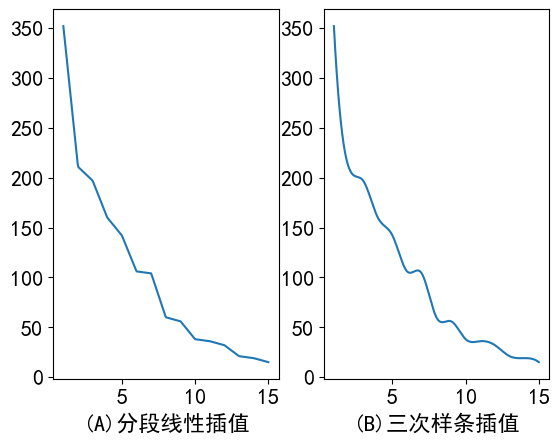

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
x=np.arange(1,16,1)
y=np.array([352,211,197,160,142,106,104,60,56,38,36,32,21,19,15])
xnew=np.linspace(1,15,300)
f1=interp1d(x,y,fill_value="extrapolate");y1=f1(xnew)
f2=interp1d(x,y,'cubic',fill_value="extrapolate");y2=f2(xnew)
plt.rc('font',size=16);plt.rc('font',family='SimHei')
plt.subplot(121),plt.plot(xnew,y1);plt.xlabel("(A)分段线性插值")
plt.subplot(122),plt.plot(xnew,y2);plt.xlabel("(B)三次样条插值")
plt.savefig("figure7_2.png",dpi=500);plt.show()

由上面两图可以看出，用X射线来照射细菌，次数越多，细菌数越少。

7.3 在区间$[0,1]$上等间距取1000个点$x_i(i=1,2,…,1000),$计算在这些$x_i$点处函数$f(x)=\frac{x+2}{\sqrt{x+1}}$的值$y_i$,利用点$(x_i,y_i)(i=1,2,…,1000),$求插值函数$\hat{f}(x),$画出插值函数的图形，并求积分$\int_0^1 f(x) dx 和 \int_0^1 \hat{f}(x) dx.$

原函数定积分： (2.04737854124365, 2.273046796612166e-14)
插值函数定积分： (2.0473785412436483, 2.273046796612164e-14)


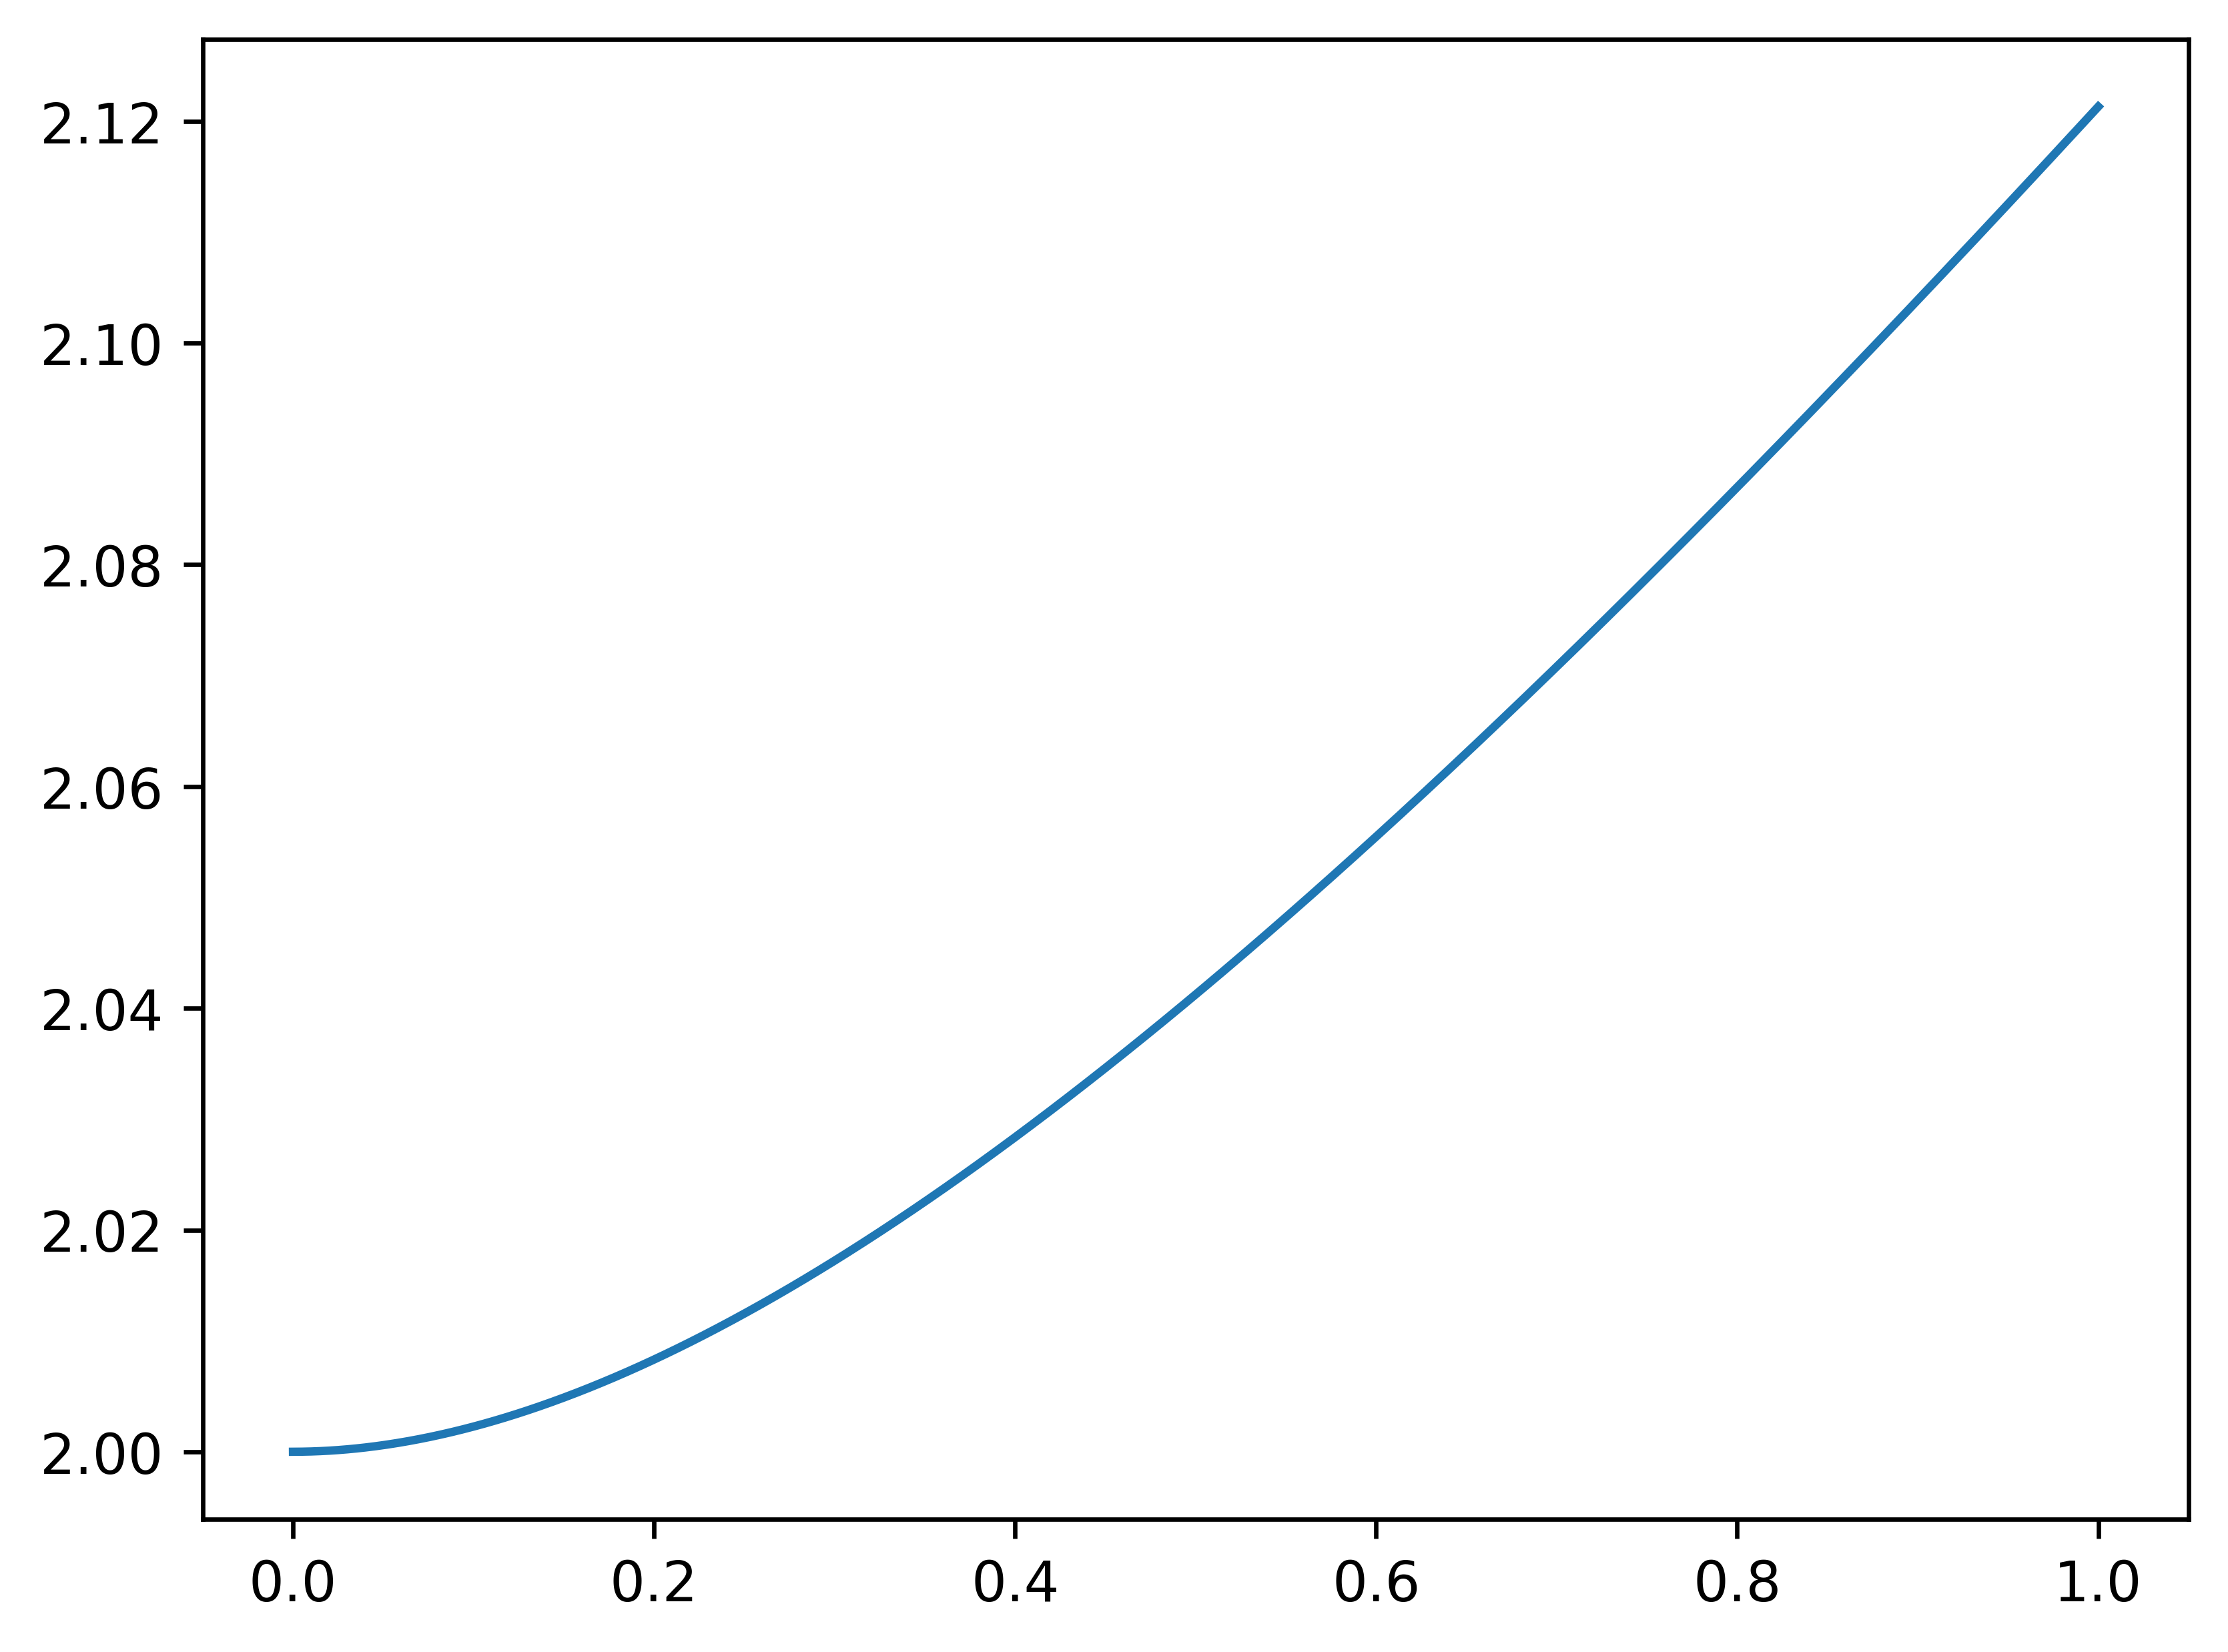

In [4]:
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt
import numpy as np
import scipy.integrate as si
# 定义f(x)
def f(x):
    return (x+2)/np.sqrt(x+1)

x=np.linspace(0,1,1000)
y = f(x)
# 求三次样条插值函数
g = CubicSpline(x, y)
# 画出插值函数图像
plt.figure(dpi = 600)
plt.plot(x,g(x))
# 求原函数定积分
x=symbols('x')
result1 = si.quad(f,0,1) # 函数 起点 终点
print("原函数定积分：",result1)
# 求插值函数定积分
result2 = si.quad(g,0,1)   # 函数 起点 终点
print("插值函数定积分：",result2)


7.4 （水箱水流量问题）许多供水单位由千没有测量流入或流出水箱流量的设备，而只能测量水箱中的水位．试通过测得的某时刻水箱中水位的数据，估计在任意时刻（包括水泵灌水期间）t流出水箱的流量f(t).

给出原始数据如表7.9所列，其中长度单位为E ($1E=30.24cm$)．水箱为圆柱体，其直径为57E.

假设：
(1) 影响水箱流量的唯一因素是该区公众对水的普通需要；

(2) 水泵的灌水速度为常数；

(3) 从水箱中流出水的最大流速小于水泵的灌水速度；

(4)每天的用水量分布都是相似的；

(5) 水箱的流水速度可用光滑曲线来近似；

(6)当水箱的水容量达到$514\times10^3g$时，开始泵水，达到$677.6\times10^3g$为时，便停止泵水．

       表7.9 水位数据表
|$时间/s$|$$水位/10^2E$$|$时间/s$|$$水位/10^2E$$|
|:------:|:------:|:------:|:------:|
|0|3175| 44636| 3350|
|3316 |3110 |49953 |3260|
|6635 |3054 |53936 |3167|
|10619|2994 |57254 |3087|
|13937 |2947 |60574 |3012|
|17921 |2892| 64554| 2927|
|21240 |2850 |68535| 2842|
|25223 |2795| 71854 |2767|
|28543 |2752 |75021 |2697|
|32284 |2697 |79254 |泵水|
|35932| 泵水|82649 |泵水|
|39332| 泵水|85968| 3475|
|39435| 3550| 89953| 3397|
|43318| 3445 |93270 |3340|

In [ ]:
#拟合曲线为二次多项式
from numpy import polyfit,polyval,array,arange
from matplotlib.pyplot import plot,show,rc
x0=arange(3316,6635,10619,13937,17921,21240,25223,28543,32284,35932,39435,43318,44636,49953,53936,57254,60574,64554,68535,71854,75021,79254,82649,85968,89953,93270)


7.5 20世纪60年代世界人口增长情况见表7.10,试求最佳拟合曲线

           表7.10 世界人口数（单位：百万）
|年份|1960 |1961 |1962 |1963 |1964 |1965 |1966 |1967 |1968|
|---|---|---|---|---|---|---|---|---|---|
|人口|2972 |3061 |3151 |3213 |3234 |3285 |3356 |3420 |3483|

7.6 某年美国旧车价格的调查资料如表7.11所示，其中x，表示轿车的使用年数，y，表示相应的平均价格试分析用什么形式的曲线拟合表中所给的数据，并预测使用4.5年后轿车的平均价格大致为多少？

            表7.11 某年美国旧车价格调查数据（单位：美元）
|$x_i$|1|2|3|4|5|6|7|8|9|10|
|---|---|---|---|---|---|---|---|---|---|---|
|$y_i$|2615|1943|1494|1087|765|538|484|290|226|204|

7.7 已知欧洲一个国家的地图，为了算出它的国土面积和边界长度，首先对地图作如下测量：以由西向东方向为x轴正向，由南向北方向为y轴正向，选择方便的原点并将从最西边界点到最东边界点在工轴上的区间适当地分为若干段，在每个分点的y方向测出南边界点和北边界点的y坐标$y_1和y_2$，这样就得到了表7.12的数据（单位：mm).

           表7.12 边界点数据
|x|7.0|10.5|13.0|17.5|34.0|40.5|44.5|48.0|56.0|
|---|---|---|---|---|---|---|---|---|---|
|$$y_1$$|44|45|47|50|50|38|30|30|34|
|$y_2$|44|59|70|72|93|100|110|110|110|
|x|61.0|68.5|76.5|80.5|91.0|96.0|101.0|104.0|106.5|
|$y_1$|36|34|41|45|46|43|37|33|28|
|$y_2$|117|118|116|118|118|121|124|121|121|
|x|111.5|118.0|123.5|136.5|142.0|146.0|150.0|157.0|158.0|
|$y_1$|32|65|55|54|52|50|66|66|68|
|$y_2$|121|122|116|83|81|82|86|85|68|

根据地图的比例我们知道18mm相当千40km,试由测量数据计算该国国土边界的近似
长度和近似面积，并与国土面积的精确值$41288km^2$比较．

# 习题8

8.1 求下列微分方程的符号解：
$$
(1)y^{\prime}-2y_2=1,y(0)=0;\\
(2)y^{\prime\prime\prime}-2y^{\prime\prime}+y=0,y(0)=y^{\prime}(0)=1,y^{\prime\prime}(0)=0.
$$

8.2 求下列傲分方程的符号解，并分别画出$x(t)和y(t)(t\in [0,1])$的解曲线
$$
\begin{cases}
\frac{dx}{dt}=x-2y,\\
\frac{dy}{dt}=x+2y,\\
x(0)=1,y(0)=0.
\end{cases}
$$

8.3 求傲分方程组（竖直加热板的自然对流）的数值解.
$$
\begin{cases}
\frac{d^3f}{d\eta^3}+3f\frac{d^2f}{d\eta^2}-2(\frac{df}{d\eta})^2+T=0,\\
\frac{d^2T}{d\eta^2}+2.1f\frac{dT}{d\eta}=0.
\end{cases}
$$
$已知当\eta=0 时,f=0,\frac{df}{d\eta}=0,\frac{d^2f}{d\eta^2}=0.68,T=1， \frac{dT}{d\eta}=-0.5.要求在区间[0,10]上，画出f(\eta)，T(\eta) 的解曲线$

8.4 捕食-被捕食者方程组
$$
\begin{cases}
\frac{dx}{dt}=0.2x-0.005xy,x(0)=70,\\
\frac{dy}{dt}=-0.5y+0.01xy,y(0)=40,
\end{cases}
$$
其中$x(t)$表示第t个月时兔子的总体数量，$y(t)$表示狐狸的总体数量.
研究如下问题：

(1)x( t)和y(t)的变化周期；

(2)x( t)的最大值和最小值，以及它们第一次出现的时间；

(3)(y )t的最大值和最小值，以及它们第一次出现的时间。

8.5 对8.3.4节中的传染病模型进行改进，提高预测精度．

8.6 某地区野兔的数董连续9年的统计数量（单位：十万）如表8.5所示．预测t = 9, 10时野兔的数量。

          表8.5 野兔数量观测值
|t|0|1|2|3|4|5|6|7|8|
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
|$$x(t)$$|5|5.9945|7.0932|8.2744|9.5073|10.57555|11.9804|13.1465|14.2247|

8.7 捕食-被捕食者方程组
$$
\begin{cases}
\frac{dx}{dt}=ax-bxy,x(0)=60,\\
\frac{dy}{dt}=-cy+dxy,y(0)=30,
\end{cases}
$$
其中$x(t)$表示第t个月时兔子的总体数量，$y(t)$表示狐狸的总体数量.参数$a,b,c,d$未知.利用表8.6的13对观测值，拟合式(8.31)中的未知参数$a,b,c,d.$

            表8.6 种群数量观测值
|t|0|1|2|3|4|5|6|8|10|12|14|16|18|
|---|---|---|---|---|---|---|---|---|---|---|---|---|---|
|$$x(t)$$|60|63|64|63|61|58|53|44|39|38|41|46|53|
|$$y(t)$$|30|34|38|44|50|55|58|56|47|38|30|27|26|